# 1. バイアス、バリアンス、ノイズ

<IPython.core.display.Javascript object>


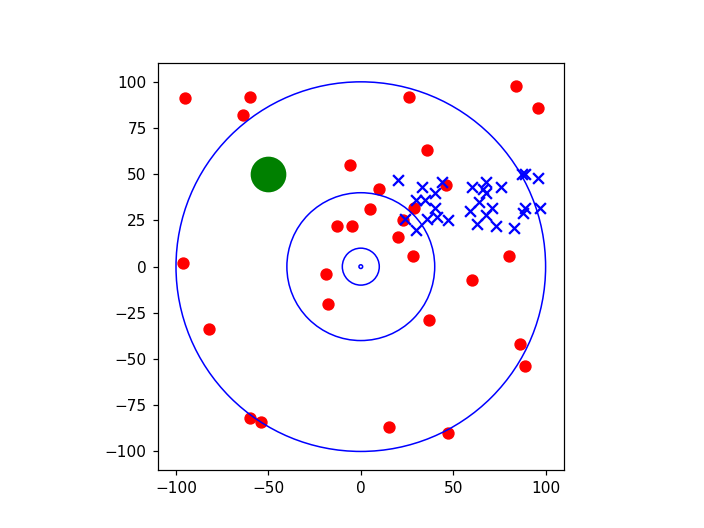

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

fig, ax = plt.subplots(1,1)
circle = patches.Circle(xy=(0, 0), radius=1, ec="blue",fc="none")
ax.add_patch(circle)
circle2 = patches.Circle(xy=(0, 0), radius=100, ec="blue",fc="none")
ax.add_patch(circle2)
circle3 = patches.Circle(xy=(0, 0), radius=40, ec="blue",fc="none")
ax.add_patch(circle3)
circle4 = patches.Circle(xy=(0, 0), radius=10, ec="blue",fc="none")
ax.add_patch(circle4)

N = 30

x1 = []
for i in range(N):
    x1.append(random.randint(-100, 100))

x2 = []
for i in range(N):
    x2.append(random.randint(20, 100))

y1 = []
y2 = []
for i in range(N):
    y1.append(random.randint(-100, 100))
   
for i in range(N):
    y2.append(random.randint(20, 50))

plt.scatter(x1,y1,c="red", s=50)
plt.scatter(x2,y2,c="blue", s=50, marker='x')
plt.scatter(-50,50,c="green", s=500)

plt.axis("scaled")
ax.set_aspect('equal')

plt.show()

# 2. 大数の法則

円周率を求める

In [1]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random
import matplotlib.patches as patches

import math

fig, ax = plt.subplots()

value =[]
x = []
y = []
ims = []
n = 0

c = patches.Circle(xy=(0, 0), radius=1,fill=False)

N1 = 100
n = 0
counter = 1

for i in range(N1):
    #value.append(random.randint(50, 70))
    
    #xx = np.random.rand()
    #yy = np.random.rand()
    yy = (random.uniform(-1, 1))
    xx = (random.uniform(-1, 1))
       
    x.append(xx)
    y.append(yy)

    if math.sqrt(xx**2 + yy**2) < 1: #円の内部に落ちたものをカウント
        n=n+1

    p=4 * float(n/counter)
       
    text1 = ax.text(-0.5,0.1,"pi:" + str(p), size = 20, color = "green")        
    text2 = ax.text(-0.5,0.3, str(n)+":"+str(N1), size = 20, color = "green")
        
    ax.add_patch(c)
    im = plt.scatter(x, y, s=10)
    ims.append([im]+[text1]+[text2])

    counter = counter + 1
    
ani = animation.ArtistAnimation(fig, ims, interval=150)
plt.show()
#print(str(n) + ":" + str(N1) + ":" + str(p))
ani.save('pi28.gif', writer="imagemagick")


<IPython.core.display.Javascript object>

<img src="pi28.gif">

<IPython.core.display.Javascript object>


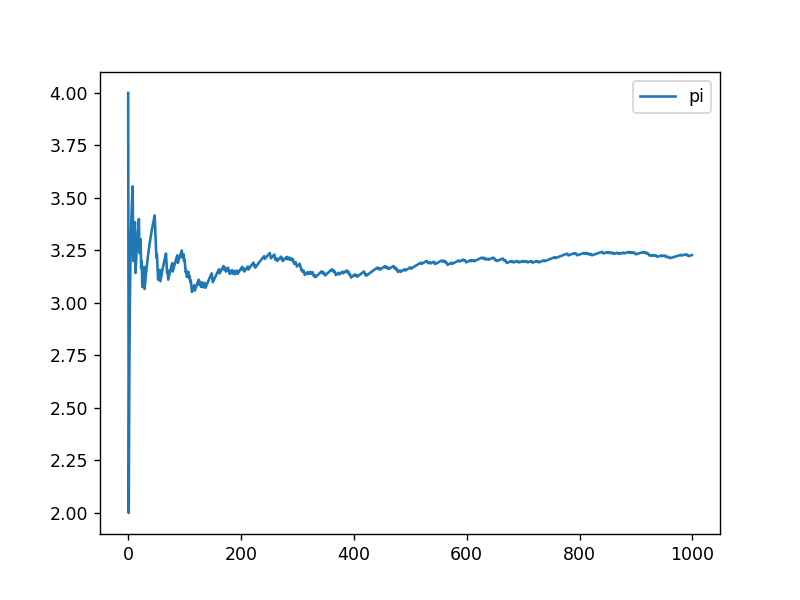

<IPython.core.display.Javascript object>


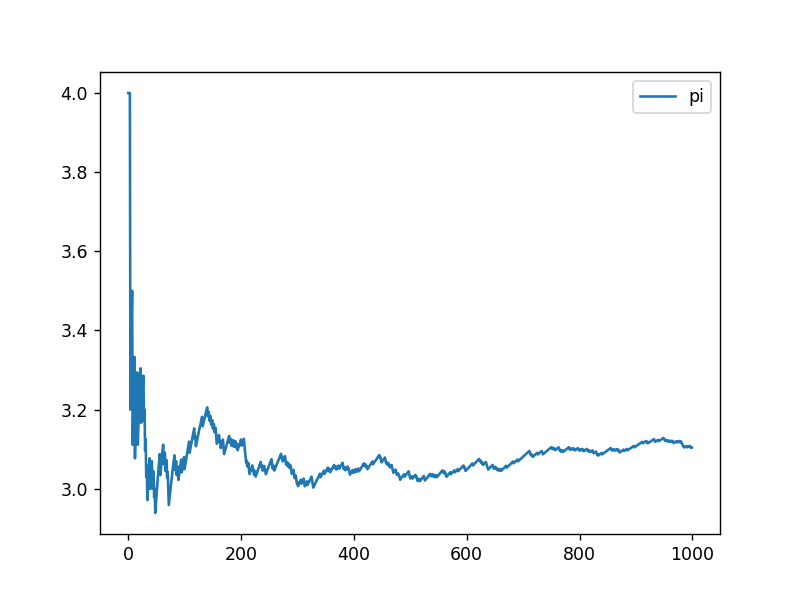

<IPython.core.display.Javascript object>


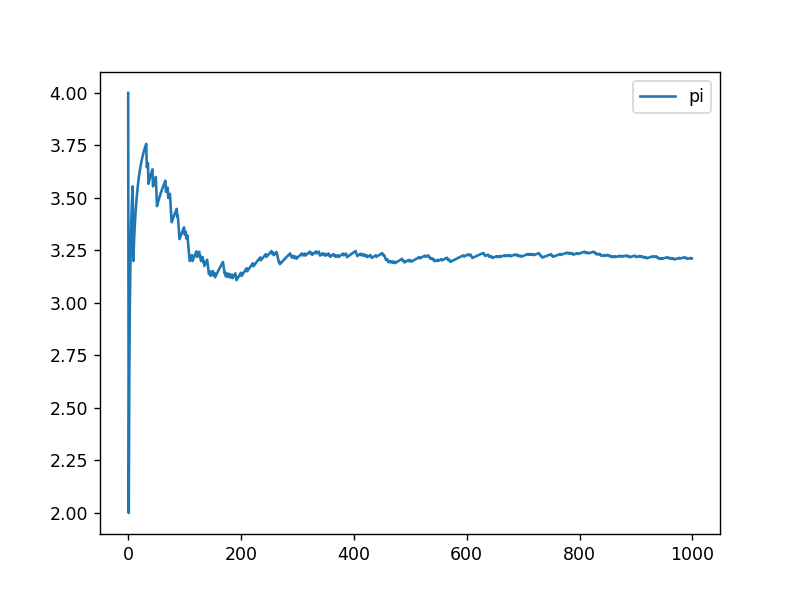

In [2]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.patches as patches

import math

#fig, ax = plt.subplots()

value =[]

ims = []
n = 0

#c = patches.Circle(xy=(0, 0), radius=1,fill=False)

N1 = 1000
n = 0

p_seq = []
counter = 1

for k in range(3):

    #x = []
    #y = []
    p_seq = []
    n = 0
    counter = 1
    
    fig, ax = plt.subplots()
        
    for i in range(N1):
        
       
        
        
        yy = (random.uniform(-1, 1))
        xx = (random.uniform(-1, 1))
       
        #x.append(xx)
        #y.append(yy)

        if math.sqrt(xx**2 + yy**2) < 1: #円の内部に落ちたものをカウント
            n=n+1

        p=4 * float(n/counter)
        p_seq.append(p)
    
        counter = counter + 1
    
    x = np.arange(0, N1, 1)  
    
    plt.plot(x, p_seq, label="pi")
    plt.legend()
    plt.show()
    

# 3. モンティ・ホール問題

![](monty.png) 

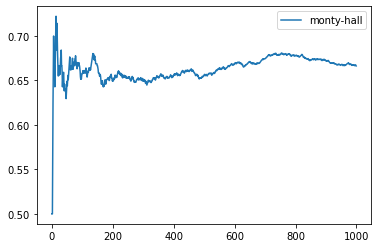

交換したときの勝率: 0.6663336663336663


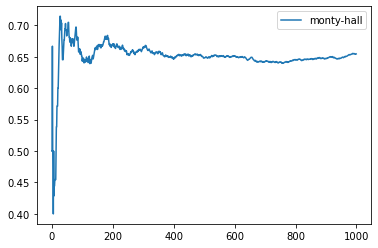

交換したときの勝率: 0.6543456543456544


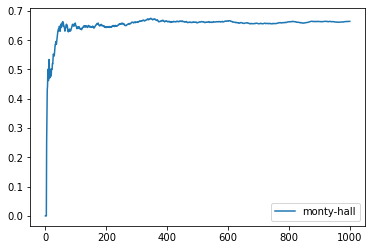

交換したときの勝率: 0.6634429400386848


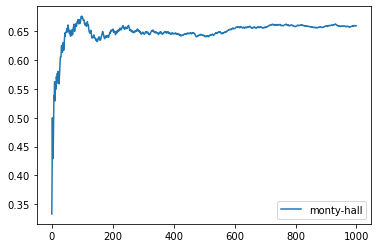

交換したときの勝率: 0.6596153846153846


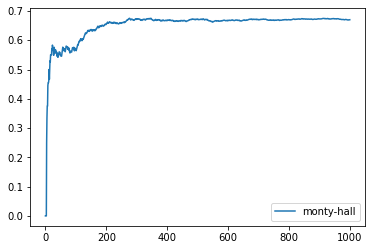

交換したときの勝率: 0.6699801192842942


In [1]:
import random
import matplotlib.pyplot as plt2

# 始めに、箱の数を決める
NUM_DOORS = 3

def monty(change):
    i = 0
    doors =[]
    
    # 初期化
    for i in range(100):
        doors.append(0)
    
    # 当たり(1)の箱を決める
    doors[random.randint(0, 100) % NUM_DOORS] = 1
    
    # 箱を選ぶ
    myChoice = random.randint(0, 100) % NUM_DOORS
    
    # 外れ(0)の箱を開ける
    for i in range(NUM_DOORS):
        if doors[i] == 0 and i != myChoice:
            doors[i] = -1
            break
            
    # 箱を変更する時        
    if change == 1:
            for i in range(NUM_DOORS):
                if doors[i] != -1 and i != myChoice:
                    myChoice = i
                    break
            
    # print(doors[myChoice])
            
    # 当たった場合    
    if doors[myChoice] == 1:
        result = 1
        
    # 外れた場合
    if doors[myChoice] != 1:
        result = 0
    
    return result

# 箱を変更しない: monty(0)
# 箱を変更する: monty(1)

counter_0 = 0
counter_1 = 0

import os
import matplotlib.pyplot as plt2
import numpy as np

#os.remove('result.txt')
#f = open('result.txt', 'a')


for j in range(5):

    ratio = []
    #N = 200
    x = np.arange(1000)

    counter_0 = 0
    counter_1 = 0
    
    for i in range(1000):
        if(monty(0)==1):
            counter_0 = counter_0 + 1
        if(monty(1)==1):
            counter_1 = counter_1 + 1

        ratio.append(counter_1 / (counter_1+counter_0 + 1))
    
    #s = "Hello, world"
    #plt.text(1, 1, s)
    plt2.plot(x, ratio, label="monty-hall")
    
    plt2.legend()
    plt2.show()

    print("交換したときの勝率: " + str(counter_1 /(counter_1+counter_0 + 1)))
    #f.write(str(counter_0)+ "," + str(counter_1) + "\n")
        
#f.close()
    
#print("変更しなかった時の勝率: " + str(counter_0/10000))        
#print("変更したときの勝率: " + str(counter_1/10000))
        